This notebook contains examples/exercises from Sutton's Reinforcement Learning book, 2nd edition

In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [2]:
import random
import sys
import time

In [3]:
from baserl.common import *
from baserl.grid_world import GridWorld
from baserl.jacks_rental import JacksRental

In [4]:
random.seed(42)
np.random.seed(42)

Initial value function:


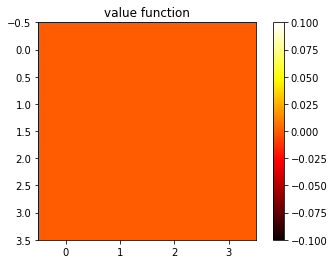


Initial greedy policy:
UDRL UDRL UDRL UDRL 
UDRL UDRL UDRL UDRL 
UDRL UDRL UDRL UDRL 
UDRL UDRL UDRL UDRL 

eval: num iter= 0
eval: num iter= 1
eval: num iter= 2
eval: num iter= 3
eval: num iter= 4
eval: num iter= 5
eval: num iter= 6
eval: num iter= 7
eval: num iter= 8
eval: num iter= 9
eval: num iter= 10
eval: num iter= 11
eval: num iter= 12
eval: num iter= 13
eval: num iter= 14
eval: num iter= 15
eval: num iter= 16
eval: num iter= 17
eval: num iter= 18
eval: num iter= 19
eval: num iter= 20
eval: num iter= 21
eval: num iter= 22
eval: num iter= 23
eval: num iter= 24
eval: num iter= 25
eval: num iter= 26
eval: num iter= 27
eval: num iter= 28
eval: num iter= 29
eval: num iter= 30
eval: num iter= 31
eval: num iter= 32
eval: num iter= 33
eval: num iter= 34
eval: num iter= 35
eval: num iter= 36
eval: num iter= 37
eval: num iter= 38
eval: num iter= 39
iterative_policy_evaluation: num iter= 40 delta= 0.06470839506731707
value function at iteration 40


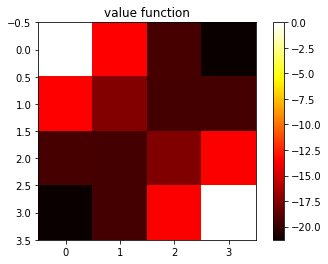


greedy policy at iteration 40
  UL    L    L    L 
   U   UL    L    D 
   U    U   DR    D 
   U    R    R   DR 

eval: num iter= 40
eval: num iter= 41
eval: num iter= 42
eval: num iter= 43
eval: num iter= 44
eval: num iter= 45
eval: num iter= 46
eval: num iter= 47
eval: num iter= 48
eval: num iter= 49
eval: num iter= 50
eval: num iter= 51
eval: num iter= 52
eval: num iter= 53
eval: num iter= 54
eval: num iter= 55
eval: num iter= 56
eval: num iter= 57
eval: num iter= 58
eval: num iter= 59
eval: num iter= 60
eval: num iter= 61
eval: num iter= 62
eval: num iter= 63
eval: num iter= 64
eval: num iter= 65
eval: num iter= 66
eval: num iter= 67
eval: num iter= 68
eval: num iter= 69
eval: num iter= 70
eval: num iter= 71
eval: num iter= 72
eval: num iter= 73
eval: num iter= 74
eval: num iter= 75
eval: num iter= 76
eval: num iter= 77
eval: num iter= 78
eval: num iter= 79
iterative_policy_evaluation: num iter= 80 delta= 0.0019516695467842737
value function at iteration 80


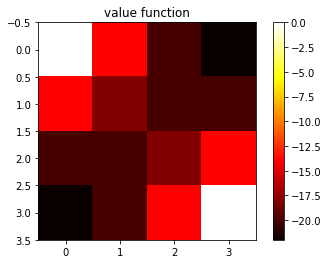


greedy policy at iteration 80
  UL    L    L    L 
   U   UL    L    D 
   U    U   DR    D 
   U    R    R   DR 

eval: num iter= 80
eval: num iter= 81
eval: num iter= 82
eval: num iter= 83
eval: num iter= 84
eval: num iter= 85
eval: num iter= 86
eval: num iter= 87
eval: num iter= 88
eval: num iter= 89
eval: num iter= 90
eval: num iter= 91
eval: num iter= 92
eval: num iter= 93
eval: num iter= 94
eval: num iter= 95
eval: num iter= 96
eval: num iter= 97
eval: num iter= 98
eval: num iter= 99
eval: num iter= 100
eval: num iter= 101
eval: num iter= 102
eval: num iter= 103
eval: num iter= 104
eval: num iter= 105
eval: num iter= 106
eval: num iter= 107
eval: num iter= 108
eval: num iter= 109
eval: num iter= 110
eval: num iter= 111
eval: num iter= 112
eval: num iter= 113
Final value function after #iters = 114


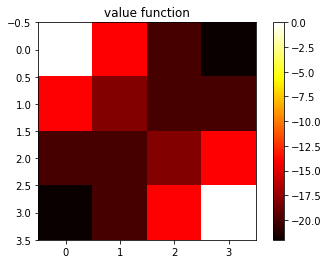

Final greedy policy after #iters = 114
  UL    L    L    L 
   U   UL    L    D 
   U    U   DR    D 
   U    R    R   DR 
in_place: True avg value: -15.9992535799

Initial value function:


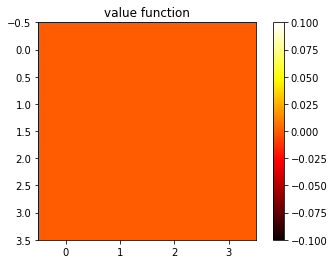


Initial greedy policy:
UDRL UDRL UDRL UDRL 
UDRL UDRL UDRL UDRL 
UDRL UDRL UDRL UDRL 
UDRL UDRL UDRL UDRL 

eval: num iter= 0
eval: num iter= 1
eval: num iter= 2
eval: num iter= 3
eval: num iter= 4
eval: num iter= 5
eval: num iter= 6
eval: num iter= 7
eval: num iter= 8
eval: num iter= 9
eval: num iter= 10
eval: num iter= 11
eval: num iter= 12
eval: num iter= 13
eval: num iter= 14
eval: num iter= 15
eval: num iter= 16
eval: num iter= 17
eval: num iter= 18
eval: num iter= 19
eval: num iter= 20
eval: num iter= 21
eval: num iter= 22
eval: num iter= 23
eval: num iter= 24
eval: num iter= 25
eval: num iter= 26
eval: num iter= 27
eval: num iter= 28
eval: num iter= 29
eval: num iter= 30
eval: num iter= 31
eval: num iter= 32
eval: num iter= 33
eval: num iter= 34
eval: num iter= 35
eval: num iter= 36
eval: num iter= 37
eval: num iter= 38
eval: num iter= 39
iterative_policy_evaluation: num iter= 40 delta= 0.1420819550167991
value function at iteration 40


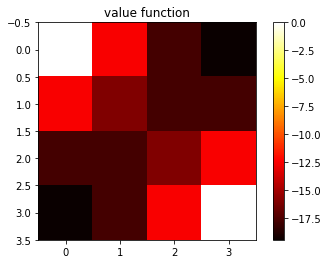


greedy policy at iteration 40
  UL    L    L   DL 
   U   UL   DL    D 
   U   UR   DR    D 
  UR    R    R   DR 

eval: num iter= 40
eval: num iter= 41
eval: num iter= 42
eval: num iter= 43
eval: num iter= 44
eval: num iter= 45
eval: num iter= 46
eval: num iter= 47
eval: num iter= 48
eval: num iter= 49
eval: num iter= 50
eval: num iter= 51
eval: num iter= 52
eval: num iter= 53
eval: num iter= 54
eval: num iter= 55
eval: num iter= 56
eval: num iter= 57
eval: num iter= 58
eval: num iter= 59
eval: num iter= 60
eval: num iter= 61
eval: num iter= 62
eval: num iter= 63
eval: num iter= 64
eval: num iter= 65
eval: num iter= 66
eval: num iter= 67
eval: num iter= 68
eval: num iter= 69
eval: num iter= 70
eval: num iter= 71
eval: num iter= 72
eval: num iter= 73
eval: num iter= 74
eval: num iter= 75
eval: num iter= 76
eval: num iter= 77
eval: num iter= 78
eval: num iter= 79
iterative_policy_evaluation: num iter= 80 delta= 0.015956611490235417
value function at iteration 80


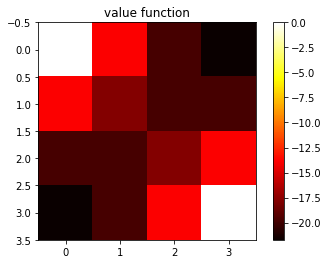


greedy policy at iteration 80
  UL    L    L   DL 
   U   UL   DL    D 
   U   UR   DR    D 
  UR    R    R   DR 

eval: num iter= 80
eval: num iter= 81
eval: num iter= 82
eval: num iter= 83
eval: num iter= 84
eval: num iter= 85
eval: num iter= 86
eval: num iter= 87
eval: num iter= 88
eval: num iter= 89
eval: num iter= 90
eval: num iter= 91
eval: num iter= 92
eval: num iter= 93
eval: num iter= 94
eval: num iter= 95
eval: num iter= 96
eval: num iter= 97
eval: num iter= 98
eval: num iter= 99
eval: num iter= 100
eval: num iter= 101
eval: num iter= 102
eval: num iter= 103
eval: num iter= 104
eval: num iter= 105
eval: num iter= 106
eval: num iter= 107
eval: num iter= 108
eval: num iter= 109
eval: num iter= 110
eval: num iter= 111
eval: num iter= 112
eval: num iter= 113
eval: num iter= 114
eval: num iter= 115
eval: num iter= 116
eval: num iter= 117
eval: num iter= 118
eval: num iter= 119
iterative_policy_evaluation: num iter= 120 delta= 0.0017920181418027425
value function at iteration 120


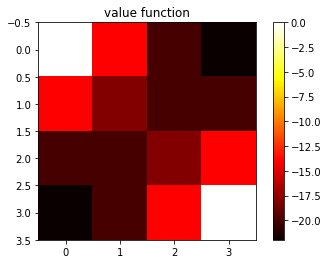


greedy policy at iteration 120
  UL    L    L   DL 
   U   UL   DL    D 
   U   UR   DR    D 
  UR    R    R   DR 

eval: num iter= 120
eval: num iter= 121
eval: num iter= 122
eval: num iter= 123
eval: num iter= 124
eval: num iter= 125
eval: num iter= 126
eval: num iter= 127
eval: num iter= 128
eval: num iter= 129
eval: num iter= 130
eval: num iter= 131
eval: num iter= 132
eval: num iter= 133
eval: num iter= 134
eval: num iter= 135
eval: num iter= 136
eval: num iter= 137
eval: num iter= 138
eval: num iter= 139
eval: num iter= 140
eval: num iter= 141
eval: num iter= 142
eval: num iter= 143
eval: num iter= 144
eval: num iter= 145
eval: num iter= 146
eval: num iter= 147
eval: num iter= 148
eval: num iter= 149
eval: num iter= 150
eval: num iter= 151
eval: num iter= 152
eval: num iter= 153
eval: num iter= 154
eval: num iter= 155
eval: num iter= 156
eval: num iter= 157
eval: num iter= 158
eval: num iter= 159
iterative_policy_evaluation: num iter= 160 delta= 0.0002012538202436076
value funct

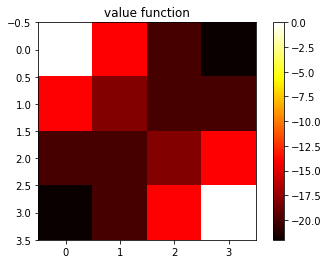


greedy policy at iteration 160
  UL    L    L   DL 
   U   UL   DL    D 
   U   UR   DR    D 
  UR    R    R   DR 

eval: num iter= 160
eval: num iter= 161
eval: num iter= 162
eval: num iter= 163
eval: num iter= 164
eval: num iter= 165
eval: num iter= 166
eval: num iter= 167
eval: num iter= 168
eval: num iter= 169
eval: num iter= 170
eval: num iter= 171
eval: num iter= 172
Final value function after #iters = 173


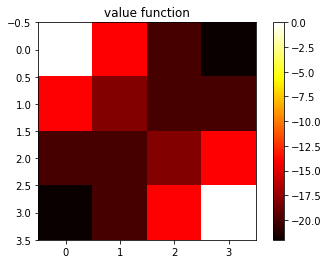

Final greedy policy after #iters = 173
  UL    L    L   DL 
   U   UL   DL    D 
   U   UR   DR    D 
  UR    R    R   DR 
in_place: False avg value: -15.9987530275



In [5]:
# Running Iterative Policy Evaluation on the Grid World problem, 
# This problem is discussed in the book on page 61.

# Here we ran both the in-place and out-of-place versions.
# We mentioned in the book, the in-place converges in fewer iterations, for instance 114 vs 173.
# In particular, we notice that the results in fig 4.1 on page 62 are reproduced with the out-of-place version (where
# we compute the new version of V using a copy of the old version), while the book mentioned that those results are for
# in-place - that is weird.
grid_world = GridWorld()
for in_place in [True, False]:
    V = iterative_policy_evaluation(
        states=grid_world.states(),
        is_terminal=grid_world.is_terminal,
        actions = grid_world.actions,
        transitions = grid_world.transitions,
        policy=make_random_policy(grid_world.states(), grid_world.actions),
        gamma=grid_world.gamma(),
        theta=0.0001,
        in_place=in_place,
        print_value=grid_world.print_value,
        print_policy=grid_world.print_policy,
        print_every_n=40)
    print('in_place:', in_place, 'avg value:', np.mean([v for v in V.values()]))
    print()

Initial value function:


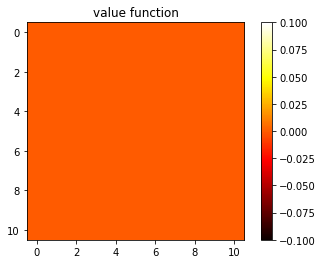


Initial greedy policy:
populate_precomputed_transitions_per_location started...
populate_precomputed_transitions_per_location done in time: 0.004017353057861328
 0  0  0  0 -1 -2 -2 -3 -3 -3 
 1  1  1  0 -1 -1 -2 -2 -2 -3 
 2  2  1  0  0 -1 -1 -1 -2 -2 
 3  2  1  1  0  0  0 -1 -1 -1 
 3  2  2  1  1  1  0  0  0  0 
 3  3  2  2  2  1  1  1  1  1 
 4  3  3  3  2  2  2  2  2  1 
 4  4  4  3  3  3  3  3  2  1 
 5  5  4  4  4  4  4  3  2  1 
 5  5  5  5  5  5  4  3  2  1 

eval: num iter= 0
eval: num iter= 1
eval: num iter= 2
eval: num iter= 3
eval: num iter= 4
eval: num iter= 5
eval: num iter= 6
eval: num iter= 7
eval: num iter= 8
eval: num iter= 9
eval: num iter= 10
eval: num iter= 11
eval: num iter= 12
eval: num iter= 13
eval: num iter= 14
eval: num iter= 15
eval: num iter= 16
eval: num iter= 17
eval: num iter= 18
eval: num iter= 19
eval: num iter= 20
eval: num iter= 21
eval: num iter= 22
eval: num iter= 23
eval: num iter= 24
eval: num iter= 25
eval: num iter= 26
eval: num iter= 27
eval:

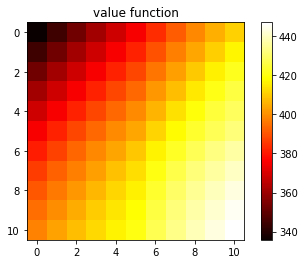


greedy policy at iteration 50
 0  0  0  0  0 -1 -1 -2 -2 -2 
 1  1  1  1  0  0 -1 -1 -1 -1 
 2  2  2  1  1  0  0  0  0 -1 
 3  3  2  2  1  1  1  1  0  0 
 4  3  3  2  2  2  2  1  1  1 
 4  4  3  3  3  3  2  2  2  1 
 5  4  4  4  4  3  3  3  2  1 
 5  5  5  5  4  4  4  3  2  1 
 5  5  5  5  5  5  4  3  2  1 
 5  5  5  5  5  5  4  3  2  1 

eval: num iter= 50
eval: num iter= 51
eval: num iter= 52
eval: num iter= 53
eval: num iter= 54
eval: num iter= 55
eval: num iter= 56
eval: num iter= 57
eval: num iter= 58
eval: num iter= 59
eval: num iter= 60
eval: num iter= 61
eval: num iter= 62
eval: num iter= 63
eval: num iter= 64
eval: num iter= 65
eval: num iter= 66
eval: num iter= 67
Final value function after #iters = 68


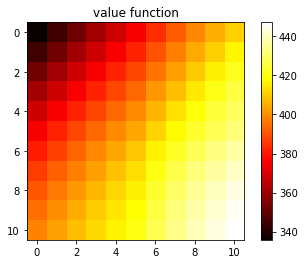

Final greedy policy after #iters = 68
 0  0  0  0  0 -1 -1 -2 -2 -2 
 1  1  1  1  0  0 -1 -1 -1 -1 
 2  2  2  1  1  0  0  0  0 -1 
 3  3  2  2  1  1  1  1  0  0 
 4  3  3  2  2  2  2  1  1  1 
 4  4  3  3  3  3  2  2  2  1 
 5  4  4  4  4  3  3  3  2  1 
 5  5  5  5  4  4  4  3  2  1 
 5  5  5  5  5  5  4  3  2  1 
 5  5  5  5  5  5  4  3  2  1 
in_place: True avg value: 402.982324846

Initial value function:


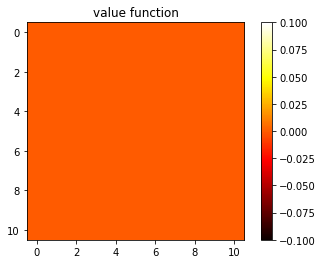


Initial greedy policy:
 0  0  0  0 -1 -2 -2 -3 -3 -3 
 1  1  1  0 -1 -1 -2 -2 -2 -3 
 2  2  1  0  0 -1 -1 -1 -2 -2 
 3  2  1  1  0  0  0 -1 -1 -1 
 3  2  2  1  1  1  0  0  0  0 
 3  3  2  2  2  1  1  1  1  1 
 4  3  3  3  2  2  2  2  2  1 
 4  4  4  3  3  3  3  3  2  1 
 5  5  4  4  4  4  4  3  2  1 
 5  5  5  5  5  5  4  3  2  1 

eval: num iter= 0
eval: num iter= 1
eval: num iter= 2
eval: num iter= 3
eval: num iter= 4
eval: num iter= 5
eval: num iter= 6
eval: num iter= 7
eval: num iter= 8
eval: num iter= 9
eval: num iter= 10
eval: num iter= 11
eval: num iter= 12
eval: num iter= 13
eval: num iter= 14
eval: num iter= 15
eval: num iter= 16
eval: num iter= 17
eval: num iter= 18
eval: num iter= 19
eval: num iter= 20
eval: num iter= 21
eval: num iter= 22
eval: num iter= 23
eval: num iter= 24
eval: num iter= 25
eval: num iter= 26
eval: num iter= 27
eval: num iter= 28
eval: num iter= 29
eval: num iter= 30
eval: num iter= 31
eval: num iter= 32
eval: num iter= 33
eval: num iter= 34
eval: num 

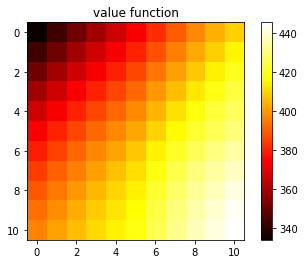


greedy policy at iteration 50
 0  0  0  0  0 -1 -1 -2 -2 -2 
 1  1  1  1  0  0 -1 -1 -1 -1 
 2  2  2  1  1  0  0  0  0 -1 
 3  3  2  2  1  1  1  1  0  0 
 4  3  3  2  2  2  2  1  1  1 
 4  4  3  3  3  3  2  2  2  1 
 5  4  4  4  4  3  3  3  2  1 
 5  5  5  5  4  4  4  3  2  1 
 5  5  5  5  5  5  4  3  2  1 
 5  5  5  5  5  5  4  3  2  1 

eval: num iter= 50
eval: num iter= 51
eval: num iter= 52
eval: num iter= 53
eval: num iter= 54
eval: num iter= 55
eval: num iter= 56
eval: num iter= 57
eval: num iter= 58
eval: num iter= 59
eval: num iter= 60
eval: num iter= 61
eval: num iter= 62
eval: num iter= 63
eval: num iter= 64
eval: num iter= 65
eval: num iter= 66
eval: num iter= 67
eval: num iter= 68
eval: num iter= 69
eval: num iter= 70
eval: num iter= 71
eval: num iter= 72
eval: num iter= 73
eval: num iter= 74
eval: num iter= 75
eval: num iter= 76
eval: num iter= 77
eval: num iter= 78
eval: num iter= 79
eval: num iter= 80
eval: num iter= 81
eval: num iter= 82
eval: num iter= 83
eval: num it

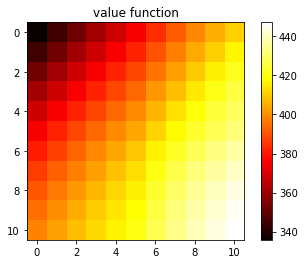


greedy policy at iteration 100
 0  0  0  0  0 -1 -1 -2 -2 -2 
 1  1  1  1  0  0 -1 -1 -1 -1 
 2  2  2  1  1  0  0  0  0 -1 
 3  3  2  2  1  1  1  1  0  0 
 4  3  3  2  2  2  2  1  1  1 
 4  4  3  3  3  3  2  2  2  1 
 5  4  4  4  4  3  3  3  2  1 
 5  5  5  5  4  4  4  3  2  1 
 5  5  5  5  5  5  4  3  2  1 
 5  5  5  5  5  5  4  3  2  1 

eval: num iter= 100
eval: num iter= 101
eval: num iter= 102
eval: num iter= 103
eval: num iter= 104
eval: num iter= 105
eval: num iter= 106
eval: num iter= 107
eval: num iter= 108
eval: num iter= 109
eval: num iter= 110
eval: num iter= 111
eval: num iter= 112
eval: num iter= 113
eval: num iter= 114
eval: num iter= 115
eval: num iter= 116
eval: num iter= 117
eval: num iter= 118
eval: num iter= 119
Final value function after #iters = 120


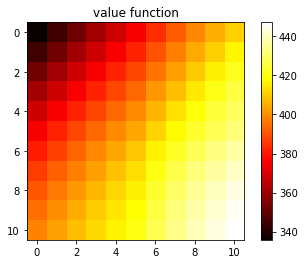

Final greedy policy after #iters = 120
 0  0  0  0  0 -1 -1 -2 -2 -2 
 1  1  1  1  0  0 -1 -1 -1 -1 
 2  2  2  1  1  0  0  0  0 -1 
 3  3  2  2  1  1  1  1  0  0 
 4  3  3  2  2  2  2  1  1  1 
 4  4  3  3  3  3  2  2  2  1 
 5  4  4  4  4  3  3  3  2  1 
 5  5  5  5  4  4  4  3  2  1 
 5  5  5  5  5  5  4  3  2  1 
 5  5  5  5  5  5  4  3  2  1 
in_place: False avg value: 402.981813462



In [6]:
# Running Iterative Policy Evaluation on the Jack's Rental problem
# This problem is described in the book on page 65

# in-place: 68 iterations
# out-of-place: 121 iterations
# Both converged to the same policy and value.

jacks_rental = JacksRental()
for in_place in [True, False]:
    V = iterative_policy_evaluation(
        states=jacks_rental.states(),
        is_terminal=jacks_rental.is_terminal,
        actions = jacks_rental.actions,
        transitions = jacks_rental.transitions,
        policy=make_random_policy(jacks_rental.states(), jacks_rental.actions),
        gamma=jacks_rental.gamma(),
        theta=0.0001,
        in_place=in_place,
        print_value=jacks_rental.print_value,
        print_policy=jacks_rental.print_policy,
        print_every_n=50)
    print('in_place:', in_place, 'avg value:', np.mean([v for v in V.values()]))
    print()

num_iter: 0
eval: num iter= 0
eval: num iter= 1
eval: num iter= 2
eval: num iter= 3
eval: num iter= 4
eval: num iter= 5
eval: num iter= 6
eval: num iter= 7
eval: num iter= 8
eval: num iter= 9
eval: num iter= 10
eval: num iter= 11
eval: num iter= 12
eval: num iter= 13
eval: num iter= 14
eval: num iter= 15
eval: num iter= 16
eval: num iter= 17
eval: num iter= 18
eval: num iter= 19
eval: num iter= 20
eval: num iter= 21
eval: num iter= 22
eval: num iter= 23
eval: num iter= 24
eval: num iter= 25
eval: num iter= 26
eval: num iter= 27
eval: num iter= 28
eval: num iter= 29
eval: num iter= 30
eval: num iter= 31
eval: num iter= 32
eval: num iter= 33
eval: num iter= 34
eval: num iter= 35
eval: num iter= 36
eval: num iter= 37
eval: num iter= 38
eval: num iter= 39
eval: num iter= 40
eval: num iter= 41
eval: num iter= 42
eval: num iter= 43
eval: num iter= 44
eval: num iter= 45
eval: num iter= 46
eval: num iter= 47
eval: num iter= 48
eval: num iter= 49
eval: num iter= 50
eval: num iter= 51
eval: num 

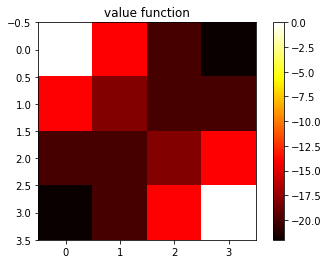


greedy policy at iteration 1
  UL    L    L    L 
   U   UL    L    D 
   U    U   DR    D 
   U    R    R   DR 

num_iter: 1
eval: num iter= 0
eval: num iter= 1
eval: num iter= 2
Number of states where policy changed: 2
value function at iteration 2


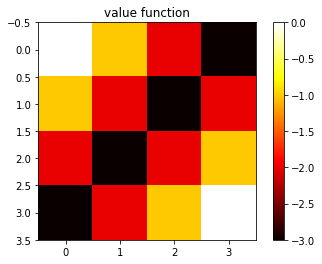


greedy policy at iteration 2
  UL    L    L   DL 
   U   UL UDRL    D 
   U UDRL   DR    D 
  UR    R    R   DR 

num_iter: 2
eval: num iter= 0
eval: num iter= 1
eval: num iter= 2
eval: num iter= 3
Number of states where policy changed: 0
value function at iteration 3


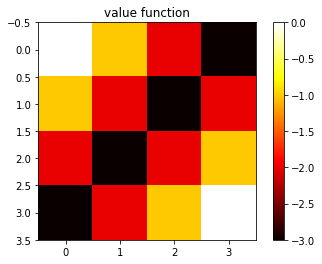


greedy policy at iteration 3
  UL    L    L   DL 
   U   UL UDRL    D 
   U UDRL   DR    D 
  UR    R    R   DR 



In [8]:
# Applying the Policy Iteration algorithm to the Grid World problem

grid_world = GridWorld()
reward_evaluator = make_transitions_based_reward_evaluator(grid_world.transitions)
grid_world_policy, grid_world_v = policy_iteration(
    states=grid_world.states(), 
    is_terminal=grid_world.is_terminal, 
    actions=grid_world.actions,
    transitions=grid_world.transitions,
    gamma=grid_world.gamma(),
    policy_evaluator=make_iterative_policy_evaluator(theta=0.0001, max_iter=150, 
                                                    reward_evaluator=reward_evaluator),
    reward_evaluator=reward_evaluator,
    delta_policy_improv=0.00000001,
    max_iter_policy_improv=10,
    print_value=grid_world.print_value,
    print_policy=grid_world.print_policy)

num_iter: 0
eval: num iter= 0
populate_precomputed_transitions_per_location started...
populate_precomputed_transitions_per_location done in time: 0.004988908767700195
eval: num iter= 1
eval: num iter= 2
eval: num iter= 3
eval: num iter= 4
eval: num iter= 5
eval: num iter= 6
eval: num iter= 7
eval: num iter= 8
eval: num iter= 9
eval: num iter= 10
eval: num iter= 11
eval: num iter= 12
eval: num iter= 13
eval: num iter= 14
eval: num iter= 15
eval: num iter= 16
eval: num iter= 17
eval: num iter= 18
eval: num iter= 19
eval: num iter= 20
eval: num iter= 21
eval: num iter= 22
eval: num iter= 23
eval: num iter= 24
eval: num iter= 25
eval: num iter= 26
eval: num iter= 27
eval: num iter= 28
eval: num iter= 29
eval: num iter= 30
eval: num iter= 31
eval: num iter= 32
eval: num iter= 33
eval: num iter= 34
eval: num iter= 35
eval: num iter= 36
eval: num iter= 37
eval: num iter= 38
eval: num iter= 39
eval: num iter= 40
eval: num iter= 41
eval: num iter= 42
eval: num iter= 43
eval: num iter= 44
eval:

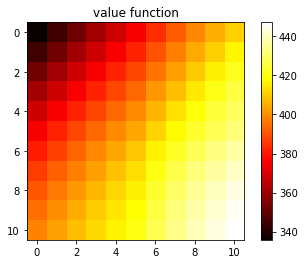


greedy policy at iteration 1
 0  0  0  0  0 -1 -1 -2 -2 -2 
 1  1  1  1  0  0 -1 -1 -1 -1 
 2  2  2  1  1  0  0  0  0 -1 
 3  3  2  2  1  1  1  1  0  0 
 4  3  3  2  2  2  2  1  1  1 
 4  4  3  3  3  3  2  2  2  1 
 5  4  4  4  4  3  3  3  2  1 
 5  5  5  5  4  4  4  3  2  1 
 5  5  5  5  5  5  4  3  2  1 
 5  5  5  5  5  5  4  3  2  1 

num_iter: 1
eval: num iter= 0
eval: num iter= 1
eval: num iter= 2
eval: num iter= 3
eval: num iter= 4
eval: num iter= 5
eval: num iter= 6
eval: num iter= 7
eval: num iter= 8
eval: num iter= 9
eval: num iter= 10
eval: num iter= 11
eval: num iter= 12
eval: num iter= 13
eval: num iter= 14
eval: num iter= 15
eval: num iter= 16
eval: num iter= 17
eval: num iter= 18
eval: num iter= 19
eval: num iter= 20
eval: num iter= 21
eval: num iter= 22
eval: num iter= 23
eval: num iter= 24
eval: num iter= 25
eval: num iter= 26
eval: num iter= 27
eval: num iter= 28
eval: num iter= 29
eval: num iter= 30
eval: num iter= 31
eval: num iter= 32
eval: num iter= 33
eval: num i

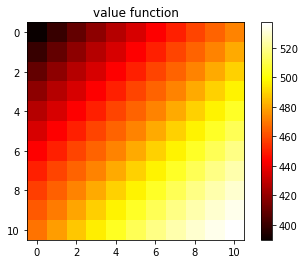


greedy policy at iteration 2
 0  0  0  0  0  0 -1 -1 -2 -2 
 1  1  1  1  1  0  0 -1 -1 -1 
 2  2  2  2  1  1  0  0  0 -1 
 3  3  3  2  2  1  1  1  0  0 
 4  4  3  3  2  2  2  1  1  0 
 5  4  4  3  3  3  2  2  1  1 
 5  5  4  4  4  3  3  2  2  1 
 5  5  5  5  4  4  3  3  2  1 
 5  5  5  5  5  4  4  3  2  1 
 5  5  5  5  5  5  4  3  2  1 

num_iter: 2
eval: num iter= 0
eval: num iter= 1
eval: num iter= 2
eval: num iter= 3
eval: num iter= 4
eval: num iter= 5
eval: num iter= 6
eval: num iter= 7
eval: num iter= 8
eval: num iter= 9
eval: num iter= 10
eval: num iter= 11
eval: num iter= 12
eval: num iter= 13
eval: num iter= 14
eval: num iter= 15
eval: num iter= 16
eval: num iter= 17
eval: num iter= 18
eval: num iter= 19
eval: num iter= 20
eval: num iter= 21
eval: num iter= 22
eval: num iter= 23
eval: num iter= 24
eval: num iter= 25
eval: num iter= 26
eval: num iter= 27
eval: num iter= 28
eval: num iter= 29
eval: num iter= 30
eval: num iter= 31
eval: num iter= 32
eval: num iter= 33
eval: num i

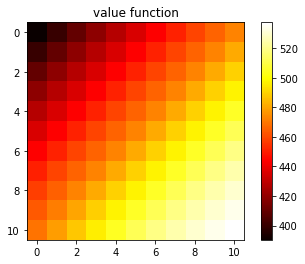


greedy policy at iteration 3
 0  0  0  0  0  0 -1 -1 -2 -2 
 1  1  1  1  1  0  0 -1 -1 -1 
 2  2  2  2  1  1  0  0  0 -1 
 3  3  3  2  2  1  1  1  0  0 
 4  4  3  3  2  2  2  1  1  0 
 5  4  4  3  3  3  2  2  1  1 
 5  5  4  4  4  3  3  2  2  1 
 5  5  5  5  4  4  3  3  2  1 
 5  5  5  5  5  4  4  3  2  1 
 5  5  5  5  5  5  4  3  2  1 

Done in time: 226.65158557891846


In [9]:
# Applying the Policy Iteration algorithm to a smaller version of Jack's Rental problem.
# The expected output from this problem is discussed in the book on page 66.

jacks_rental = JacksRental(max_cars=10)
reward_evaluator = make_transitions_based_reward_evaluator(jacks_rental.transitions)
start_time = time.time()
jacks_rental_policy, jacks_rental_v = policy_iteration(
    states=jacks_rental.states(), 
    is_terminal=jacks_rental.is_terminal, 
    actions=jacks_rental.actions,
    transitions=jacks_rental.transitions,
    gamma=jacks_rental.gamma(),
    policy_evaluator=make_iterative_policy_evaluator(theta=0.000001, max_iter=100, 
                                                    reward_evaluator=reward_evaluator),
    reward_evaluator=reward_evaluator,
    delta_policy_improv=0.000001,
    max_iter_policy_improv=10,
    print_value=jacks_rental.print_value,
    print_policy=jacks_rental.print_policy)
print("Done in time:", time.time()-start_time)